### Importando paquetes y el conjunto de datos

In [2]:
%pip install numpy pandas matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [24]:
#df = pd.read_csv("https://github.com/ulewis/Ejemplos/raw/main/Datos/USA_Housing.csv")
df1 = pd.read_csv("ad_viz_plotval_data.csv")
df2 = pd.read_csv('ad_viz_plotval_data (2).csv')
df3 = pd.read_csv('ad_viz_plotval_data (1).csv')

df = pd.concat([df1, df2, df3], ignore_index=True)
df.head()  # vemos los 5 primeros datos del dataframe

,Date,Source,Site ID,POC,Daily Max 8-hour CO Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,...,AQS Parameter Description,Method Code,CBSA Code,CBSA Name,State FIPS Code,State,County FIPS Code,County,Site Latitude,Site Longitude
0,01/01/2024,AQS,120110034,1,0.7,ppm,8,Daniela Banu NCORE,19,79.0,...,Carbon monoxide,554,33100,"Miami-Fort Lauderdale-West Palm Beach, FL",12,Florida,11,Broward,26.053889,-80.256944
1,01/02/2024,AQS,120110034,1,0.5,ppm,6,Daniela Banu NCORE,24,100.0,...,Carbon monoxide,554,33100,"Miami-Fort Lauderdale-West Palm Beach, FL",12,Florida,11,Broward,26.053889,-80.256944
2,01/03/2024,AQS,120110034,1,0.4,ppm,5,Daniela Banu NCORE,24,100.0,...,Carbon monoxide,554,33100,"Miami-Fort Lauderdale-West Palm Beach, FL",12,Florida,11,Broward,26.053889,-80.256944
3,01/04/2024,AQS,120110034,1,0.7,ppm,8,Daniela Banu NCORE,24,100.0,...,Carbon monoxide,554,33100,"Miami-Fort Lauderdale-West Palm Beach, FL",12,Florida,11,Broward,26.053889,-80.256944
4,01/05/2024,AQS,120110034,1,0.2,ppm,2,Daniela Banu NCORE,18,75.0,...,Carbon monoxide,554,33100,"Miami-Fort Lauderdale-West Palm Beach, FL",12,Florida,11,Broward,26.053889,-80.256944


### Consultar información básica sobre el conjunto de datos

**El método 'info()'los tipos y números de datos**

In [34]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8975 entries, 0 to 8974
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               8975 non-null   object 
 1   Source                             8975 non-null   object 
 2   Site ID                            8975 non-null   int64  
 3   POC                                8975 non-null   int64  
 4   Daily Max 8-hour CO Concentration  8975 non-null   float64
 5   Units                              8975 non-null   object 
 6   Daily AQI Value                    8975 non-null   int64  
 7   Local Site Name                    8975 non-null   object 
 8   Daily Obs Count                    8975 non-null   int64  
 9   Percent Complete                   8975 non-null   float64
 10  AQS Parameter Code                 8975 non-null   int64  
 11  AQS Parameter Description          8975 non-null   objec

**El método 'describe()' obtiene un resumen de estadísticas de las características del conjunto de datos**

In [33]:
df.describe()


,Site ID,POC,Daily Max 8-hour CO Concentration,Daily AQI Value,Daily Obs Count,Percent Complete,AQS Parameter Code,Method Code,CBSA Code,State FIPS Code,County FIPS Code,Site Latitude,Site Longitude
count,8.975000e+03,8975.000000,8975.000000,8975.000000,8975.000000,8975.000000,8975.0,8975.000000,8975.000000,8975.0,8975.000000,8975.000000,8975.000000
mean,1.206147e+08,1.117214,0.364747,4.094819,23.047688,96.042006,42101.0,399.488802,37831.369359,12.0,61.406574,27.760083,-81.557242
std,3.817790e+05,0.321694,0.220057,2.634150,3.331368,13.854199,0.0,238.032049,6570.499459,0.0,38.165057,1.505356,1.162099
min,1.201100e+08,1.000000,-0.300000,0.000000,1.000000,4.000000,42101.0,54.000000,27260.000000,12.0,11.000000,25.785472,-84.161111
25%,1.203101e+08,1.000000,0.200000,2.000000,24.000000,100.000000,42101.0,93.000000,33100.000000,12.0,31.000000,26.132677,-82.469532
50%,1.205730e+08,1.000000,0.300000,3.000000,24.000000,100.000000,42101.0,554.000000,36740.000000,12.0,57.000000,27.955133,-81.606833
75%,1.209520e+08,1.000000,0.500000,6.000000,24.000000,100.000000,42101.0,593.000000,45300.000000,12.0,95.000000,28.596389,-80.284206
max,1.212900e+08,2.000000,2.400000,27.000000,24.000000,100.000000,42101.0,593.000000,45300.000000,12.0,129.000000,30.262778,-80.169817


**El método 'columns' obtiene los nombres de las columnas (características)**

In [27]:
df.columns


Index(['Date', 'Source', 'Site ID', 'POC', 'Daily Max 8-hour CO Concentration',
       'Units', 'Daily AQI Value', 'Local Site Name', 'Daily Obs Count',
       'Percent Complete', 'AQS Parameter Code', 'AQS Parameter Description',
       'Method Code', 'CBSA Code', 'CBSA Name', 'State FIPS Code', 'State',
       'County FIPS Code', 'County', 'Site Latitude', 'Site Longitude'],
      dtype='object')

### Visualización básica del conjunto de datos

In [32]:
# Solo columnas categóricas (object)
categorical_cols = df.select_dtypes(include=['int64']).columns

# Contar valores únicos en cada columna
unique_counts = df[categorical_cols].nunique().sort_values(ascending=False)

print(unique_counts)

Daily Obs Count       24
Daily AQI Value       19
Site ID               11
County FIPS Code       7
CBSA Code              5
Method Code            4
POC                    2
AQS Parameter Code     1
State FIPS Code        1
dtype: int64


**Pairplots usando seaborn**

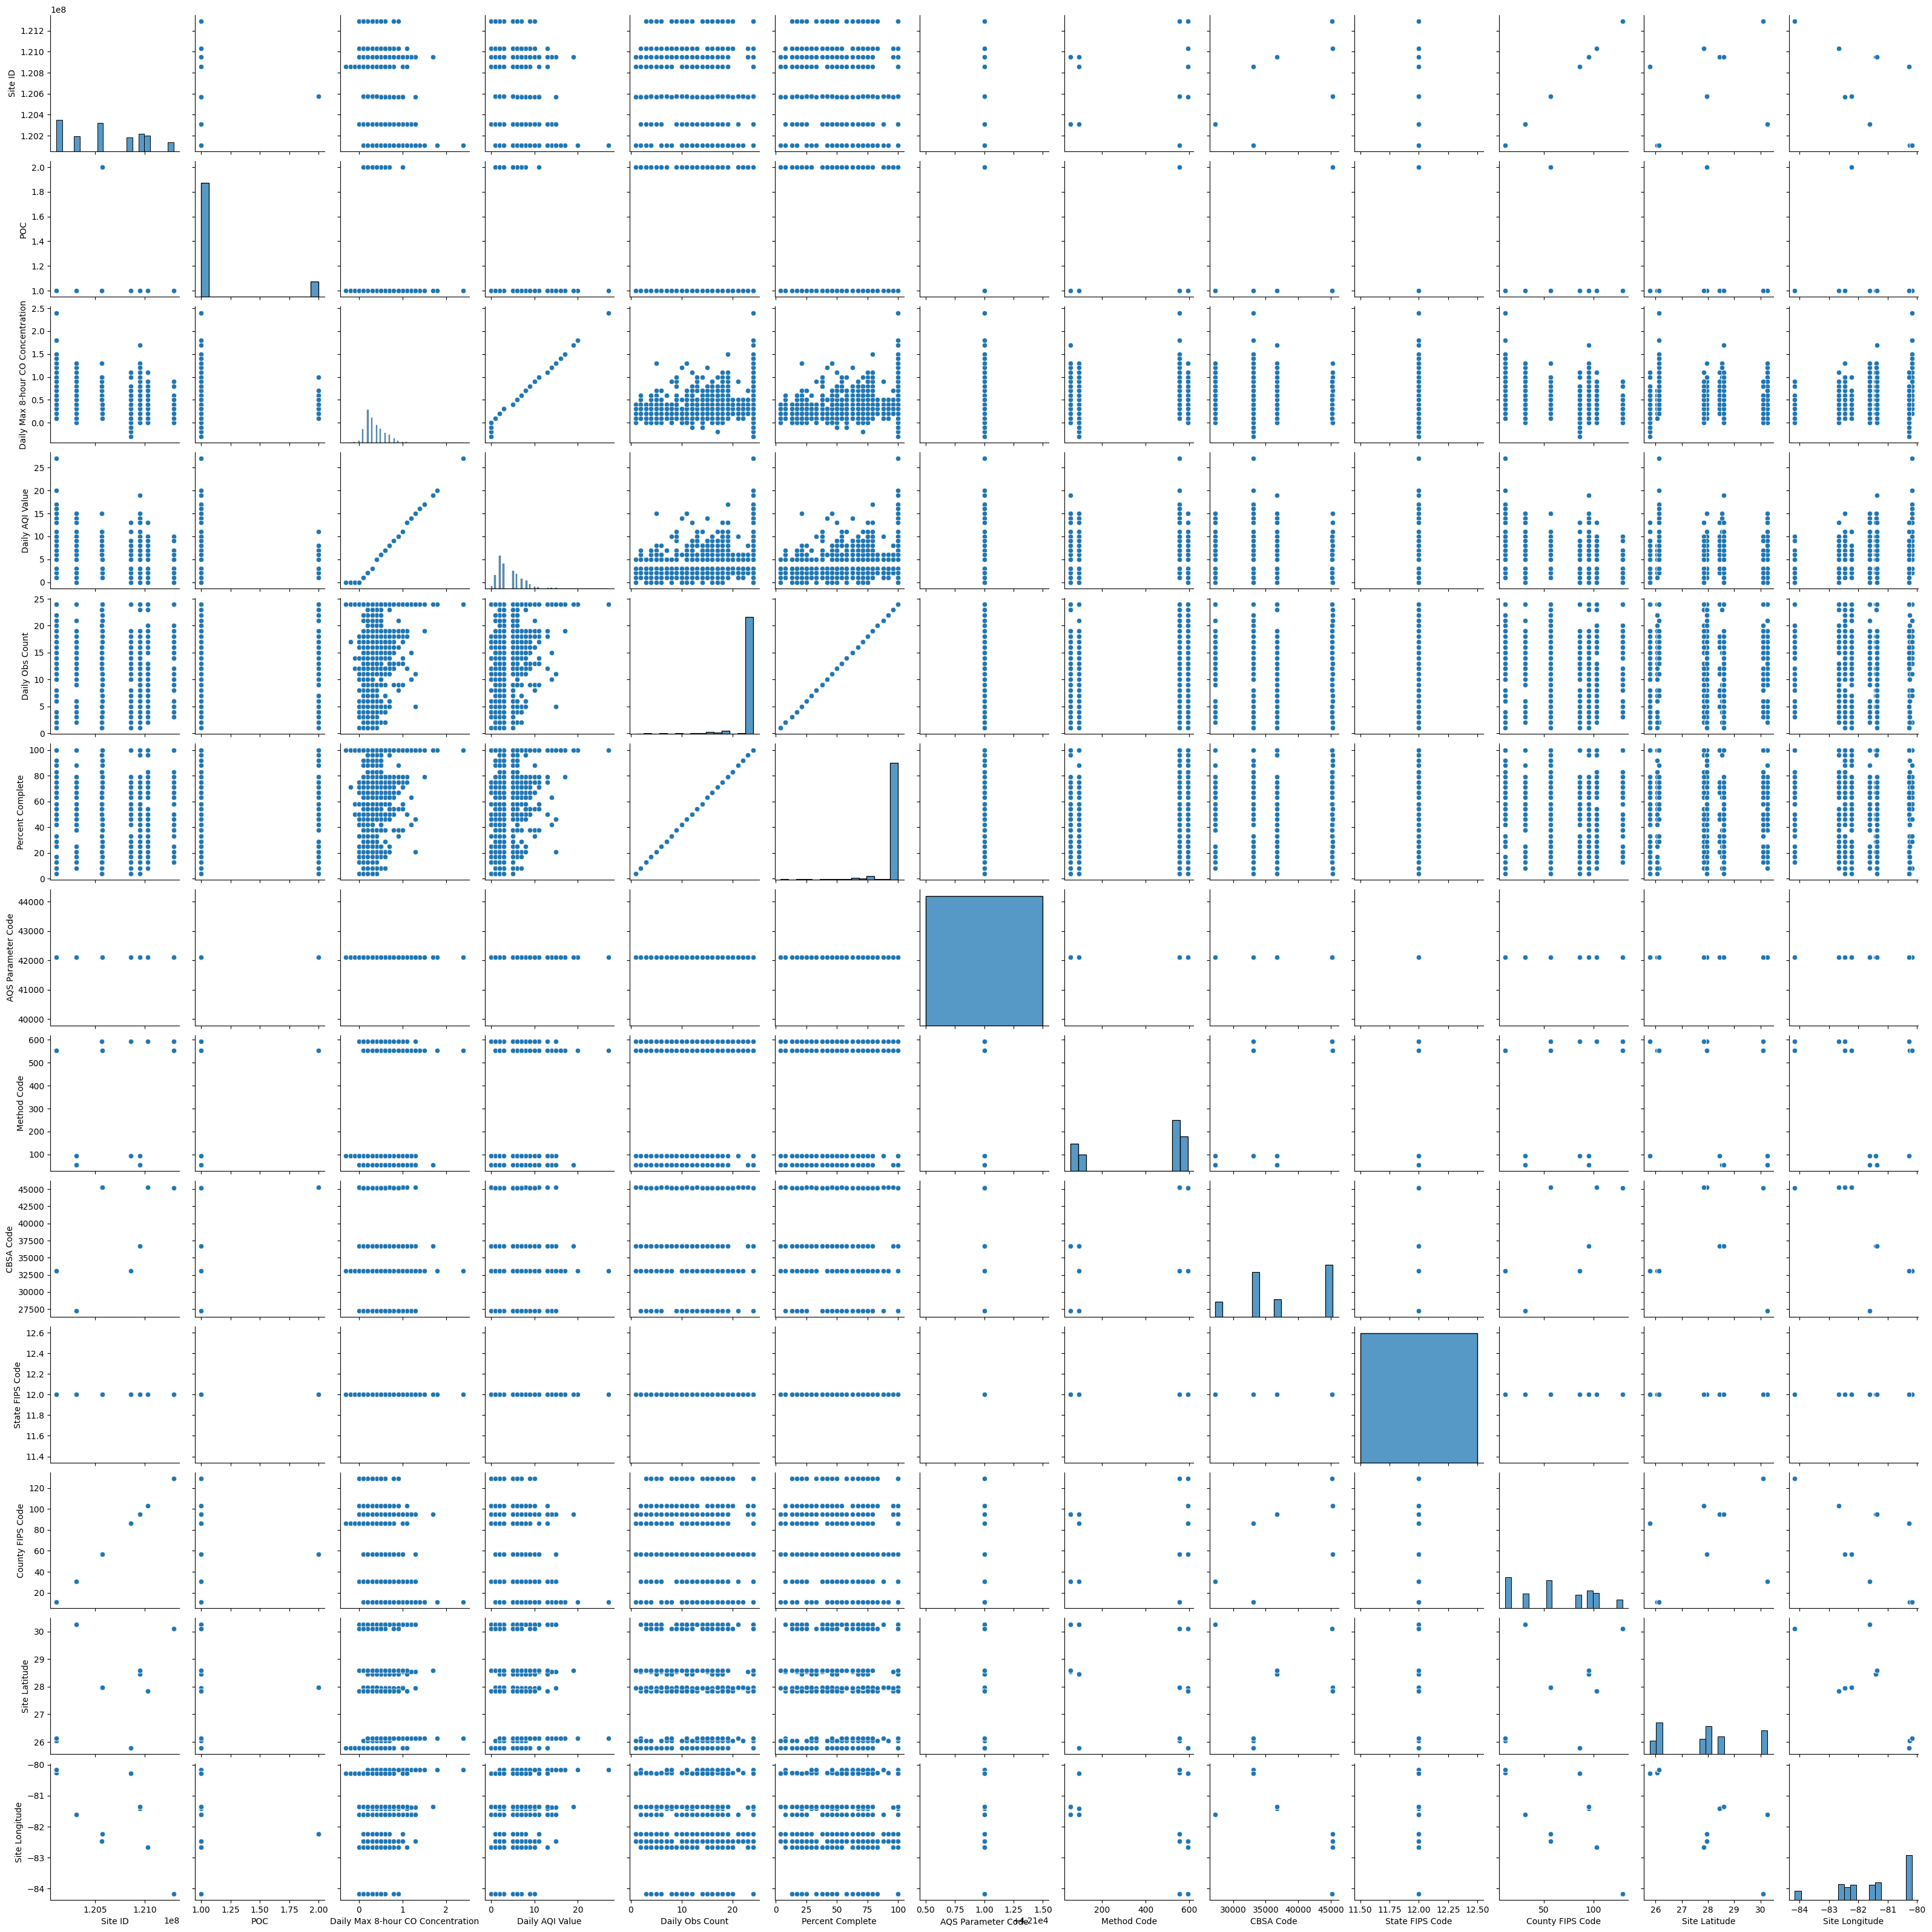

In [29]:
sns.pairplot(df)

**Distribución del precio (la cantidad prevista)**

<Axes: ylabel='Frequency'>

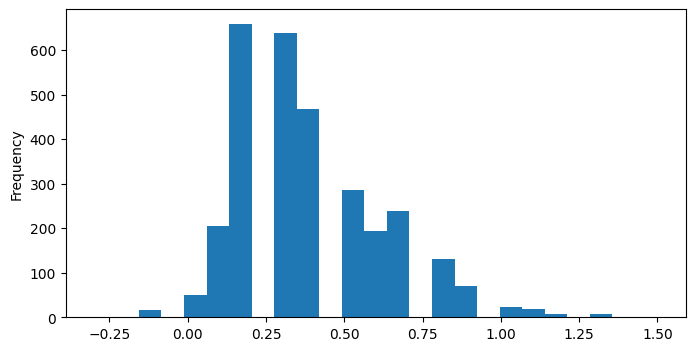

In [20]:
df['Daily Max 8-hour CO Concentration'].plot.hist(bins=25,figsize=(8,4))

<Axes: ylabel='Density'>

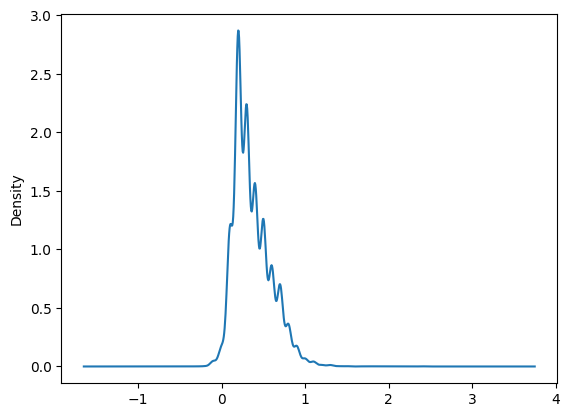

In [35]:
df['Daily Max 8-hour CO Concentration'].plot.density()

**Matriz de correlación y heatmap**

In [36]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.corr()

,Site ID,POC,Daily Max 8-hour CO Concentration,Daily AQI Value,Daily Obs Count,Percent Complete,AQS Parameter Code,Method Code,CBSA Code,State FIPS Code,County FIPS Code,Site Latitude,Site Longitude
Site ID,1.000000,-0.039768,-0.298212,-0.291570,-0.063031,-0.063005,NaN,-0.129513,0.564048,NaN,0.999996,0.366541,-0.648249
POC,-0.039768,1.000000,-0.261797,-0.274805,-0.005528,-0.005405,NaN,0.236544,0.414219,NaN,-0.042075,0.049762,-0.211087
Daily Max 8-hour CO Concentration,-0.298212,-0.261797,1.000000,0.993600,0.062062,0.062001,NaN,-0.245195,-0.402060,NaN,-0.297698,0.071753,0.258803
Daily AQI Value,-0.291570,-0.274805,0.993600,1.000000,0.063447,0.063388,NaN,-0.265196,-0.414309,NaN,-0.291024,0.072974,0.264600
Daily Obs Count,-0.063031,-0.005528,0.062062,0.063447,1.000000,0.999983,NaN,-0.034144,-0.088270,NaN,-0.063017,-0.052098,0.090336
Percent Complete,-0.063005,-0.005405,0.062001,0.063388,0.999983,1.000000,NaN,-0.034043,-0.088186,NaN,-0.062992,-0.051985,0.090203
AQS Parameter Code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Method Code,-0.129513,0.236544,-0.245195,-0.265196,-0.034144,-0.034043,NaN,1.000000,0.598478,NaN,-0.129349,-0.307645,-0.271724
CBSA Code,0.564048,0.414219,-0.402060,-0.414309,-0.088270,-0.088186,NaN,0.598478,1.000000,NaN,0.563313,0.127816,-0.743911
State FIPS Code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

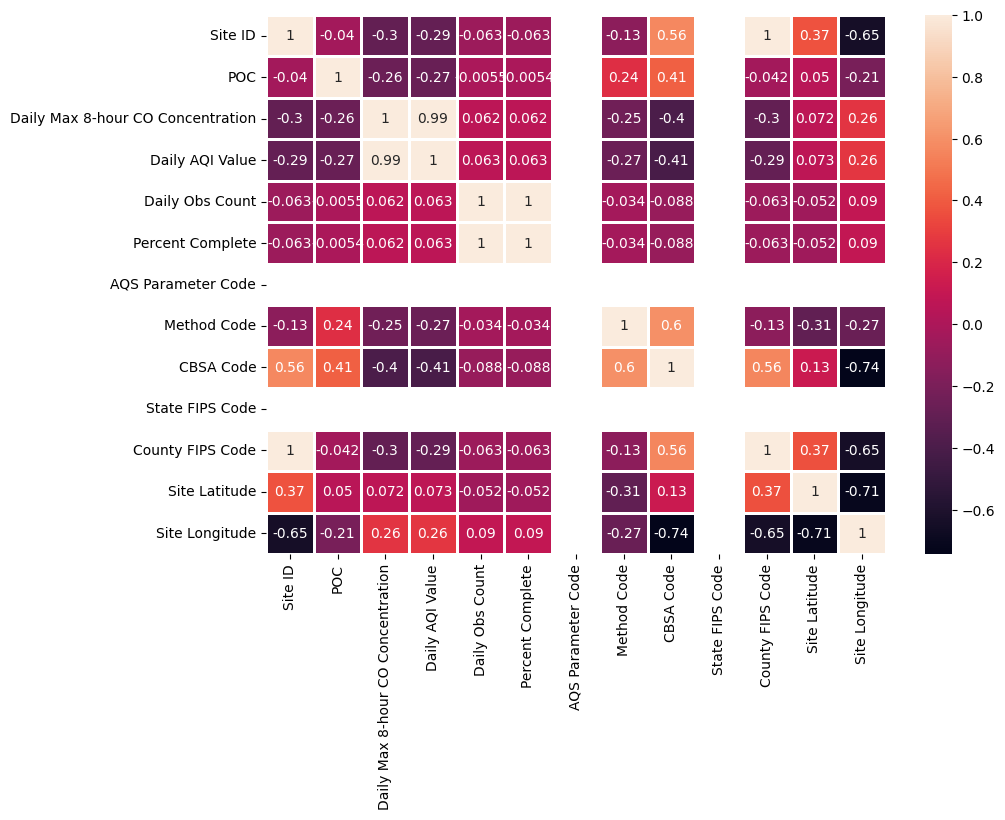

In [37]:
plt.figure(figsize=(10,7))
sns.heatmap(numeric_df.corr(),annot=True,linewidths=2)

### Conjuntos de características y variables

**Haga una lista de los nombres de las columnas del dataframe**

In [40]:
l_column = list(df.columns) # Haciendo una lista de las columnas
len_feature = len(l_column) # Longitud de la lista de vectores de columna
l_column

['Date',
 'Source',
 'Site ID',
 'POC',
 'Daily Max 8-hour CO Concentration',
 'Units',
 'Daily AQI Value',
 'Local Site Name',
 'Daily Obs Count',
 'Percent Complete',
 'AQS Parameter Code',
 'AQS Parameter Description',
 'Method Code',
 'CBSA Code',
 'CBSA Name',
 'State FIPS Code',
 'State',
 'County FIPS Code',
 'County',
 'Site Latitude',
 'Site Longitude',
 'Days_Since_Start',
 'Month',
 'Day',
 'Weekday']

In [69]:
print(df['Date'].head())


0   2024-01-01
1   2024-01-02
2   2024-01-03
3   2024-01-04
4   2024-01-05
Name: Date, dtype: datetime64[ns]


In [ ]:
# Asegúrate de que 'Date' sea un datetime
df['Date'] = pd.to_datetime(df['Date'])

# Crear nuevas columnas a partir de la fecha
df['Days_Since_Start'] = (df['Date'] - df['Date'].min()).dt.days
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day


In [109]:
df['Year'] = df['Date'].dt.year


In [110]:

# Variables categóricas
cat_cols = ['Source', 'Units', 'Local Site Name', 'AQS Parameter Description',
            'CBSA Name', 'State', 'County']

# Convertir categóricas a variables dummy
df_encoded = pd.get_dummies(df[cat_cols], drop_first=True)

# Variables numéricas
num_cols = ['Days_Since_Start', 'Month', 'Day', 'Year',
            'Daily AQI Value', 'Daily Obs Count', 'Percent Complete',
            'Site Latitude', 'Site Longitude', 'Method Code']

X_num = df[num_cols]

# Combinar
X = pd.concat([X_num, df_encoded], axis=1)

# Variable objetivo
y = df['Daily Max 8-hour CO Concentration']

In [95]:
df['Date'].min()

Timestamp('2022-01-01 00:00:00')

**Coloque todas las características numéricas en X y el precio en y, ignore la dirección, que es una cadena para la regresión lineal**

In [ ]:
#X = df[l_column[0:len_feature-2]]
#y = df[l_column[len_feature-2]]

In [111]:
print("Tamaño de Características:",X.shape)
print("Tamaño de Variable Objetivo:",y.shape)

Tamaño de Características: (8975, 30)
Tamaño de Variable Objetivo: (8975,)


In [112]:
X.head()

,Days_Since_Start,Month,Day,Year,Daily AQI Value,Daily Obs Count,Percent Complete,Site Latitude,Site Longitude,Method Code,...,"CBSA Name_Miami-Fort Lauderdale-West Palm Beach, FL","CBSA Name_Orlando-Kissimmee-Sanford, FL","CBSA Name_Tallahassee, FL","CBSA Name_Tampa-St. Petersburg-Clearwater, FL",County_Duval,County_Hillsborough,County_Miami-Dade,County_Orange,County_Pinellas,County_Wakulla
0,730,1,1,2024,8,19,79.0,26.053889,-80.256944,554,...,True,False,False,False,False,False,False,False,False,False
1,731,1,2,2024,6,24,100.0,26.053889,-80.256944,554,...,True,False,False,False,False,False,False,False,False,False
2,732,1,3,2024,5,24,100.0,26.053889,-80.256944,554,...,True,False,False,False,False,False,False,False,False,False
3,733,1,4,2024,8,24,100.0,26.053889,-80.256944,554,...,True,False,False,False,False,False,False,False,False,False
4,734,1,5,2024,2,18,75.0,26.053889,-80.256944,554,...,True,False,False,False,False,False,False,False,False,False


In [114]:
print(X.dtypes)

Days_Since_Start                                         int64
Month                                                    int32
Day                                                      int32
Year                                                     int32
Daily AQI Value                                          int64
Daily Obs Count                                          int64
Percent Complete                                       float64
Site Latitude                                          float64
Site Longitude                                         float64
Method Code                                              int64
Local Site Name_I-4 Near Road                             bool
Local Site Name_Munro Street (Near-Road)                  bool
Local Site Name_Near Road - Fort Lauderdale               bool
Local Site Name_Pepsi Place                               bool
Local Site Name_Perimeter Road                            bool
Local Site Name_Presidents' Drive Near Road            

In [113]:
y.head()

0    0.7
1    0.5
2    0.4
3    0.7
4    0.2
Name: Daily Max 8-hour CO Concentration, dtype: float64

### División de entrenamiento-prueba

**Importamos la función train_test_split de scikit-learn**

In [116]:
from sklearn.model_selection import train_test_split

**Creamos los conjuntos de entrenamiento X y de prueba y en un comando usando una proporción de división y una semilla aleatoria**

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

**Verifique el tamaño y la forma de las divisiones de entrenamiento/prueba (debe estar en la proporción según el parámetro test_size anterior)**

In [117]:
print("Tamaño del conjunto de características del entrenamiento:",X_train.shape)
print("Tamaño del conjunto de características de prueba:",X_test.shape)
print("Tamaño de la variable objetivo del entrenamiento:",y_train.shape)
print("Tamaño de la variable objetivo de prueba:",y_test.shape)

Tamaño del conjunto de características del entrenamiento: (7180, 30)
Tamaño del conjunto de características de prueba: (1795, 30)
Tamaño de la variable objetivo del entrenamiento: (7180,)
Tamaño de la variable objetivo de prueba: (1795,)


### Ajuste y entrenamiento del modelo

**Importamos el estimador de modelo de regresión lineal de scikit-learn e lo instanciamos**

In [118]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [119]:
lm = LinearRegression() # Creando un objeto de Regresión Lineal 'lm'

**Ajustamos el modelo al propio objeto instanciado**

In [120]:
lm.fit(X_train,y_train) # Ajuste el modelo lineal en el objeto 'lm' en sí, es decir, no es necesario establecer esto en otra variable

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


**Verificamos la intercepción y los coeficientes y los colocamos en un DataFrame**

In [121]:
print("El término de intersección del modelo lineal:", lm.intercept_)

El término de intersección del modelo lineal: -1250.5754738784465


In [122]:
print("Los coeficientes del modelo lineal:", lm.coef_)

Los coeficientes del modelo lineal: [-1.68655980e-03  5.12246463e-02  1.62934204e-03  6.18574489e-01
  8.35859779e-02  2.09053853e-02 -5.03337121e-03  2.28330812e-03
  3.55841475e-03  3.80302399e-05  1.17973659e-02 -3.74218856e-03
 -8.43731614e-03 -5.35039316e-04 -3.16769473e-03 -1.11371764e-02
  3.83461056e-03 -1.92098094e-03 -3.14634714e-04  2.44197594e-03
 -4.23932430e-04  3.10216539e-03 -3.14634714e-04 -1.82855893e-03
 -5.35039316e-04  9.24220057e-05 -3.16769473e-03  3.10216539e-03
 -1.92098094e-03 -3.14634714e-04]


In [123]:
#idict = {'Coefficients':lm.intercept_}
#idf = pd.DataFrame(data=idict,index=['Intercept'])
cdf = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coefficients"])
#cdf=pd.concat([idf,cdf], axis=0)
cdf

,Coefficients
Days_Since_Start,-0.001687
Month,0.051225
Day,0.001629
Year,0.618574
Daily AQI Value,0.083586
Daily Obs Count,0.020905
Percent Complete,-0.005033
Site Latitude,0.002283
Site Longitude,0.003558
Method Code,0.000038


### Cálculo de errores estándar y estadística t para los coeficientes

In [124]:
n=X_train.shape[0]
k=X_train.shape[1]
dfN = n-k
train_pred=lm.predict(X_train)
train_error = np.square(train_pred - y_train)
sum_error=np.sum(train_error)
se=[0] * len(X_train.columns)
for i in range(k):
    r = (sum_error/dfN)
    r = r/np.sum(np.square(X_train[list(X_train.columns)[i]]-X_train[list(X_train.columns)[i]].mean()))
    se[i]=np.sqrt(r)
cdf['Standard Error']=se
cdf['t-statistic']=cdf['Coefficients']/cdf['Standard Error']
cdf

,Coefficients,Standard Error,t-statistic
Days_Since_Start,-0.001687,8.840304e-07,-1907.807470
Month,0.051225,8.184856e-05,625.846629
Day,0.001629,3.217627e-05,50.638004
Year,0.618574,3.452469e-04,1791.687350
Daily AQI Value,0.083586,1.079303e-04,774.444342
Daily Obs Count,0.020905,8.585224e-05,243.504251
Percent Complete,-0.005033,2.064310e-05,-243.828216
Site Latitude,0.002283,1.885957e-04,12.106896
Site Longitude,0.003558,2.443243e-04,14.564312
Method Code,0.000038,1.191590e-06,31.915544


In [125]:
print("Por lo tanto, las características organizadas en orden de importancia para predecir el precio de la vivienda\n",'-'*90,sep='')
l=list(cdf.sort_values('t-statistic',ascending=False).index)
print(' > \n'.join(l))

Por lo tanto, las características organizadas en orden de importancia para predecir el precio de la vivienda
------------------------------------------------------------------------------------------
Year > 
Daily AQI Value > 
Month > 
Daily Obs Count > 
Day > 
Method Code > 
Site Longitude > 
Site Latitude > 
Local Site Name_I-4 Near Road > 
Local Site Name_SYDNEY > 
County_Orange > 
CBSA Name_Orlando-Kissimmee-Sanford, FL > 
Local Site Name_WINTER PARK > 
County_Hillsborough > 
Local Site Name_St. Marks Wildlife Refuge > 
CBSA Name_Tallahassee, FL > 
County_Wakulla > 
County_Duval > 
Local Site Name_Pepsi Place > 
CBSA Name_Miami-Fort Lauderdale-West Palm Beach, FL > 
County_Pinellas > 
Local Site Name_Sawgrass Lake Park (Near-Road) > 
CBSA Name_Tampa-St. Petersburg-Clearwater, FL > 
Local Site Name_Perimeter Road > 
County_Miami-Dade > 
Local Site Name_Munro Street (Near-Road) > 
Local Site Name_Presidents' Drive Near Road > 
Local Site Name_Near Road - Fort Lauderdale > 
Percent Co

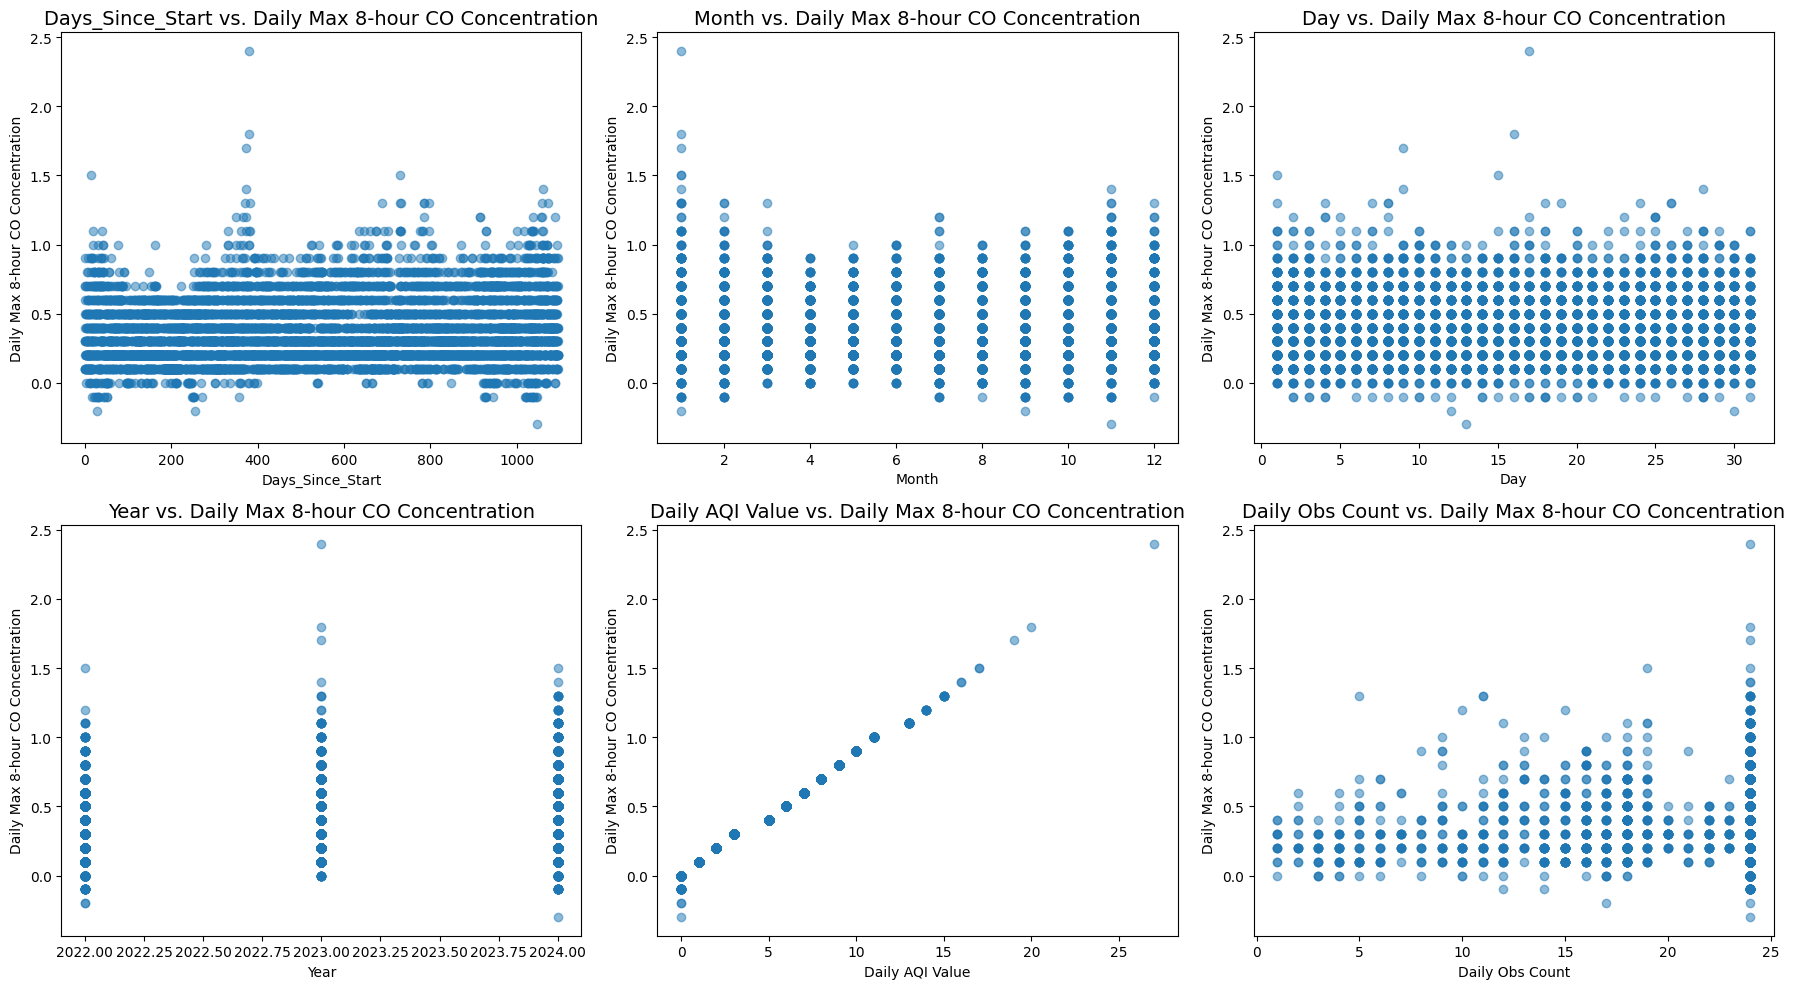

In [126]:
# Lista de columnas (ej: las más importantes del modelo)
l = list(cdf.index)   # asumiendo que cdf tiene tus coeficientes / features ordenadas

# Cuántas variables quieres graficar (ej: 6 primeras)
n = 6
cols_to_plot = l[:n]

# Definir el grid: 2 filas x 3 columnas
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()  # para iterar fácilmente

# Hacer scatter plot para cada columna contra "Billing Amount"
for i, col in enumerate(cols_to_plot):
    axes[i].scatter(df[col], df["Daily Max 8-hour CO Concentration"], alpha=0.5)
    axes[i].set_title(f"{col} vs. Daily Max 8-hour CO Concentration", fontsize=14)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Daily Max 8-hour CO Concentration")

plt.tight_layout()
plt.show()

**R cuadrado del ajuste del modelo**

In [127]:
print("Valor del R cuadrado de este ajuste:",round(metrics.r2_score(y_train,train_pred),3))

Valor del R cuadrado de este ajuste: 0.988


### Matrices de evaluación de predicción, estimación de error y regresión

**Predicción usando el modelo lm**

In [128]:
predictions = lm.predict(X_test)
print ("Tipo del objeto predicho :", type(predictions))
print ("Tamaño del objeto predicho:", predictions.shape)

Tipo del objeto predicho : <class 'numpy.ndarray'>
Tamaño del objeto predicho: (1795,)


**Diagrama de dispersión (Scatterplot) del precio previsto y el conjunto de prueba y para ver si los datos caen en una línea recta de 45 grados**

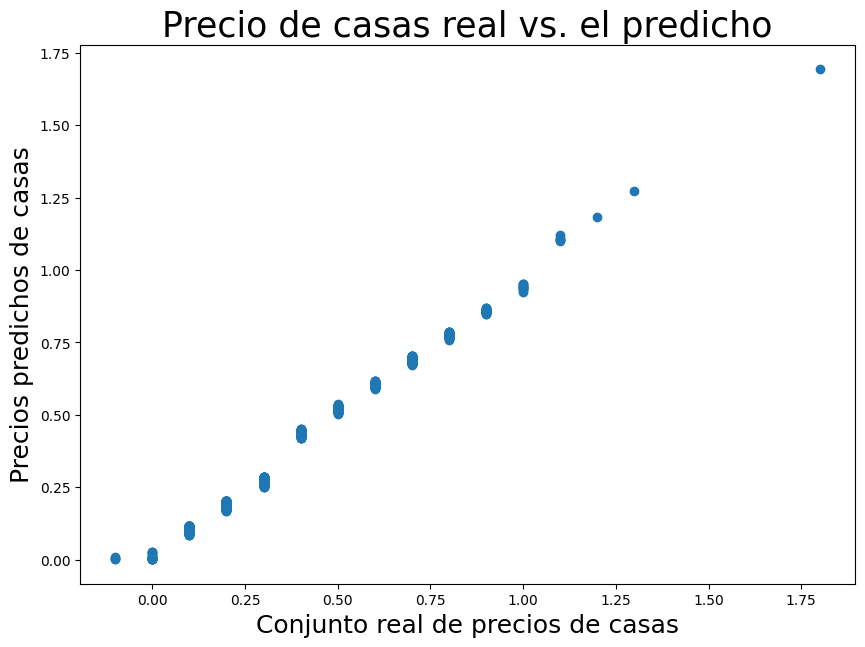

In [129]:
plt.figure(figsize=(10,7))
plt.title("Precio de casas real vs. el predicho",fontsize=25)
plt.xlabel("Conjunto real de precios de casas",fontsize=18)
plt.ylabel("Precios predichos de casas", fontsize=18)
plt.scatter(x=y_test,y=predictions)

**Visualizamos el histograma de los residuos, es decir, errores predichos (se espera un patrón distribuido normalmente)**

C:\Users\Cayetano\AppData\Local\Temp\ipykernel_15912\1939217874.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot([y_test-predictions])


<Axes: title={'center': 'Histograma de residuos para verificar la normalidad '}, xlabel='Residuos', ylabel='Densidad del kernel'>

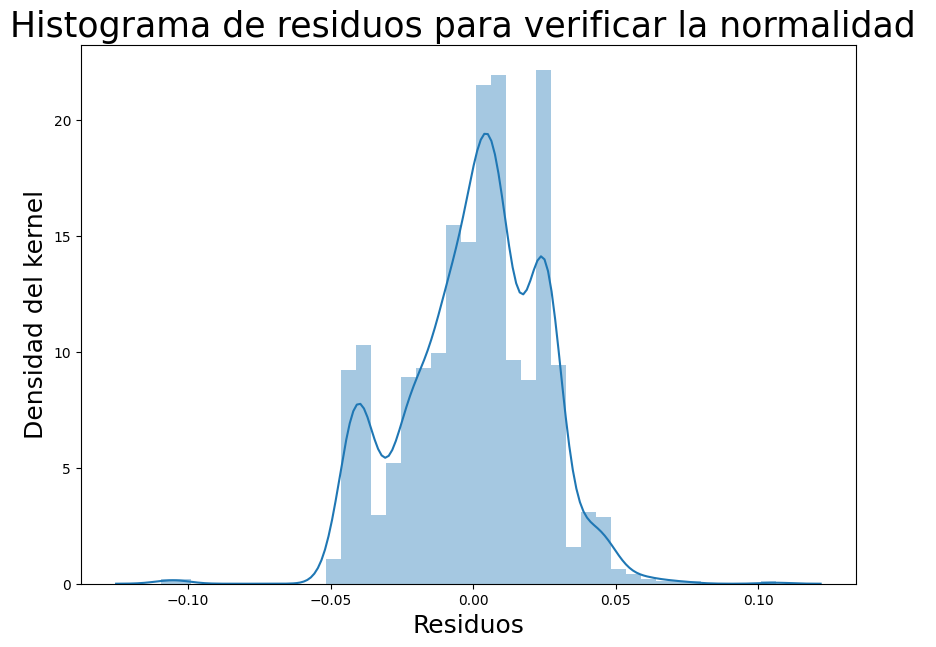

In [130]:
plt.figure(figsize=(10,7))
plt.title("Histograma de residuos para verificar la normalidad ",fontsize=25)
plt.xlabel("Residuos",fontsize=18)
plt.ylabel("Densidad del kernel", fontsize=18)
sns.distplot([y_test-predictions])

**Diagrama de dispersión de residuos y valores predichos (Homoscedasticidad)**


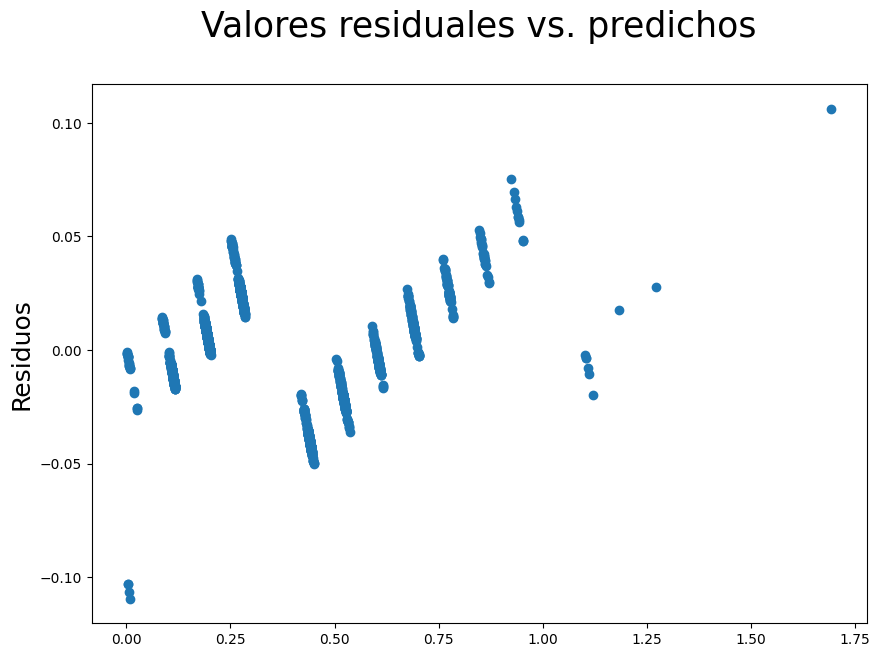

In [134]:
plt.figure(figsize=(10,7))
plt.title("Valores residuales vs. predichos\n",fontsize=25)

plt.ylabel("Residuos", fontsize=18)
plt.scatter(x=predictions,y=y_test-predictions)

**Métricas de evaluación de la regresión**

In [132]:
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))

Mean absolute error (MAE): 0.01859670106944349
Mean square error (MSE): 0.0005506182594800634
Root mean square error (RMSE): 0.023465256433290123


**Valor R cuadrado**

In [133]:
print("Valor R-squared de las predicciones:",round(metrics.r2_score(y_test,predictions),3))

Valor R-squared de las predicciones: 0.989
